In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
#from api_keys import api_key

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")
merged_df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,REGION,LOCALE,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,1,5,12.0,...,NaN,22667.0,NaN,0.5769,0.429326288,0.511318242,0.563870968,32750,22666.5,32600
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,1,5,12.0,...,NaN,22684.0,NaN,0.8161,0.618270079,0.673330083,0.74059293,21833,14500,42800
2,100690,Amridge University,Montgomery,AL,36117-3553,1,1,2,5,12.0,...,10155.0,13380.0,NaN,0.0909,0.43902439,0.550724638,0.679245283,22890,15500,39000
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,1,5,12.0,...,NaN,22059.0,NaN,0.8255,0.680887372,0.742248062,0.816953317,22647,16500,48300
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,1,5,12.0,...,NaN,19242.0,NaN,0.6262,0.366037736,0.442307692,0.491967872,31500,24728,27600


In [125]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index(drop=True)
merged_df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,ICLEVEL,CONTROL,REGION,LOCALE,...,NPT4_PRIV,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,1,5,12.0,...,NaN,22667.0,NaN,0.5769,0.429326288,0.511318242,0.563870968,32750,22666.5,32600
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,1,5,12.0,...,NaN,22684.0,NaN,0.8161,0.618270079,0.673330083,0.74059293,21833,14500,42800
2,100690,Amridge University,Montgomery,AL,36117-3553,1,1,2,5,12.0,...,10155.0,13380.0,NaN,0.0909,0.43902439,0.550724638,0.679245283,22890,15500,39000
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,1,5,12.0,...,NaN,22059.0,NaN,0.8255,0.680887372,0.742248062,0.816953317,22647,16500,48300
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,1,5,12.0,...,NaN,19242.0,NaN,0.6262,0.366037736,0.442307692,0.491967872,31500,24728,27600


In [126]:
#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

In [127]:
#Convert the data columns to floats
for column in merged_df.columns[10:]:
    merged_df[column] = pd.to_numeric(merged_df[column])
merged_df.dtypes

UNITID                int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
MAIN                  int64
ICLEVEL               int64
CONTROL               int64
REGION                int64
LOCALE              float64
LATITUDE            float64
LONGITUDE           float64
ADM_RATE            float64
NPT4_PUB            float64
NPT4_PRIV           float64
COSTT4_A            float64
COSTT4_P            float64
RET_FT4             float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
COMPL_RPY_7YR_RT    float64
GRAD_DEBT_MDN_x     float64
GRAD_DEBT_MDN_y     float64
MD_EARN_WNE_P10     float64
dtype: object

In [139]:
# Remove all the rows with NaN for "Retention" and "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["RET_FT4", "GRAD_DEBT_MDN_x"], inplace=False)
df1 = df.groupby(["CONTROL"])[["RET_FT4", "GRAD_DEBT_MDN_x"]].mean()

# Total institues in each category
df1["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df1["RET_FT4"] = df1["RET_FT4"].map("{:.2%}".format)
df1["GRAD_DEBT_MDN_x"] = df1["GRAD_DEBT_MDN_x"].map("${:,.0f}".format)

# Convert to dataframe
df1 = pd.DataFrame(df1).reset_index()
del df1["CONTROL"]

# Rename Column and Index
df1.rename(columns={"RET_FT4":"Retention Rate", "GRAD_DEBT_MDN_x":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df1.index.rename('Control', inplace=True)

# Change column order
df1 = df1[["Count", "Median Debt", "Retention Rate"]]

# Print dataframe
df1


,Count,Median Debt,Retention Rate
Control,,,
Public,615,"$20,903",74.63%
Priv. NonProfit,1127,"$23,946",73.94%
Priv. ForProfit,261,"$25,938",54.44%


In [134]:
# Remove all the rows with NaN for "Retention" and "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["RET_FT4", "GRAD_DEBT_MDN_y"], inplace=False)
df2 = df.groupby(["CONTROL"])[["RET_FT4", "GRAD_DEBT_MDN_y"]].mean()

# Total institues in each category
df2["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df2["RET_FT4"] = df2["RET_FT4"].map("{:.2%}".format)
df2["GRAD_DEBT_MDN_y"] = df2["GRAD_DEBT_MDN_y"].map("${:,.0f}".format)

# Convert to dataframe
df2 = pd.DataFrame(df2).reset_index()
del df2["CONTROL"]

# Rename Column and Index
df2.rename(columns={"RET_FT4":"Retention Rate", "GRAD_DEBT_MDN_y":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df2.index.rename('Control', inplace=True)

# Change column order
df2 = df2[["Count", "Median Debt", "Retention Rate"]]

# Print dataframe
df2


,Count,Median Debt,Retention Rate
Control,,,
Public,590,"$15,396",74.66%
Priv. NonProfit,1063,"$17,820",74.48%
Priv. ForProfit,174,"$19,053",56.95%


In [144]:
# Create combined 2009 and 2017 summary
summary_data = df1.merge(df2,left_index=True,right_index=True,how="inner")
summary_data.rename(columns={"Count_x":"Count_2009",
                             "Median Debt_x":"Median Debt_2009",
                             "Retention Rate_x":"Retention Rate_2009",
                             "Count_y":"Count_2017",
                             "Median Debt_y":"Median Debt_2017",
                             "Retention Rate_y":"Retention Rate_2017"},
                    inplace="True")

summary_data

,Count_2009,Median Debt_2009,Retention Rate_2009,Count_2017,Median Debt_2017,Retention Rate_2017
Control,,,,,,
Public,615,"$20,903",74.63%,590,"$15,396",74.66%
Priv. NonProfit,1127,"$23,946",73.94%,1063,"$17,820",74.48%
Priv. ForProfit,261,"$25,938",54.44%,174,"$19,053",56.95%


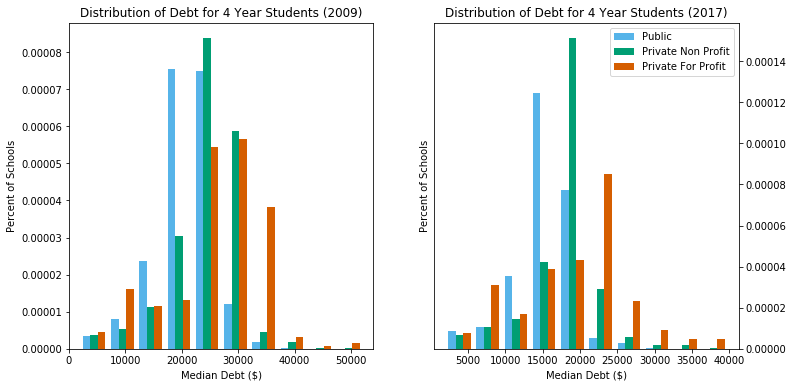

In [157]:
# Make a separate list for each institution type for 2009
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])

# Make a separate list for each institution type for 2017
y1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_y'])
y2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_y'])
y3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_y'])

# Assign colors for each institution type and the names
colors = ['#56B4E9', '#009E73', '#D55E00']
names = ["Public", "Private Non Profit", "Private For Profit"]

# Multiple subplos with one figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
ax1.hist([x1, x2, x3], bins = int(10), density=True, color = colors, label=names)
ax2.hist([y1, y2, y3], bins = int(10), density=True, color = colors, label=names)

# Add labels to X and Y axes :: Add title
ax1.set_title("Distribution of Debt for 4 Year Students (2009)")
ax1.set_xlabel("Median Debt ($)")
ax1.set_ylabel("Percent of Schools")

# Add labels to X and Y axes :: Add title
ax2.set_title("Distribution of Debt for 4 Year Students (2017)")
ax2.set_xlabel("Median Debt ($)")
ax2.set_ylabel("Percent of Schools")
ax2.yaxis.tick_right()

# Plot formatting
plt.legend()


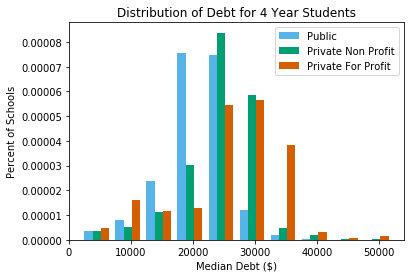

In [142]:
# Make a separate list for each institution type
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])


# Assign colors for each institution type and the names
colors = ['#56B4E9', '#009E73', '#D55E00']
names = ["Public", "Private Non Profit", "Private For Profit"]
         
# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], bins = int(10), density=True, color = colors, label=names)

# Add labels to X and Y axes :: Add title
plt.title("Distribution of Debt for 4 Year Students")
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Plot formatting
plt.legend()


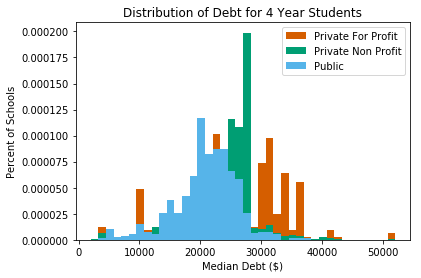

In [143]:
# Setpefilled histogram
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins = int(40), density=True, color = colors, label=names)

# Add labels to X and Y axes :: Add title
plt.title("Distribution of Debt for 4 Year Students")
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Plot formatting
plt.legend()

In [45]:
bins = np.arange(0, 40000, 1000)
group_names = []
for n in range(1, len(bins)):
    group_names.append(f"{bins[n-1]} - {bins[n]}")

test_df["Debt Category"] = pd.cut(test_df["GRAD_DEBT_MDN_x"], bins, labels=group_names)
debt_histogram = test_df[["CONTROL", "Debt Category", "index"]].groupby(["CONTROL", "Debt Category"]).count()

In [47]:
debt_histogram.fillna(0)

index
CONTROL Debt Category       
1       0 - 1000         0.0
        1000 - 2000      0.0
        2000 - 3000      0.0
        3000 - 4000      0.0
        4000 - 5000      3.0
        5000 - 6000      1.0
        6000 - 7000      2.0
        7000 - 8000      0.0
        8000 - 9000      4.0
        9000 - 10000     0.0
        10000 - 11000    3.0
        11000 - 12000    2.0
        12000 - 13000    3.0
        13000 - 14000    2.0
        14000 - 15000    5.0
        15000 - 16000    1.0
        16000 - 17000    2.0
        17000 - 18000    0.0
        18000 - 19000    1.0
        19000 - 20000    5.0
        20000 - 21000    9.0
        21000 - 22000    6.0
        22000 - 23000    7.0
        23000 - 24000    3.0
        24000 - 25000    7.0
        25000 - 26000    3.0
        26000 - 27000    6.0
        27000 - 28000    1.0
        28000 - 29000    1.0
        29000 - 30000    1.0
...                      ...
3       9000 - 10000     1.0
        10000 - 11000    0.0
        11000 - 12000    0.0
        12000 - 13000    1.0
        13000 - 14000    1.0
        14000 - 15000    1.0
        15000 - 16000    0.0
        16000 - 17000    0.0
        17000 - 18000    2.0
        18000 - 19000    1.0
        19000 - 20000    1.0
        20000 - 21000    1.0
        21000 - 22000    1.0
        22000 - 23000    3.0
        23000 - 24000    1.0
        24000 - 25000    3.0
        25000 - 26000    0.0
        26000 - 27000    2.0
        27000 - 28000    0.0
        28000 - 29000    5.0
        29000 - 30000    0.0
        30000 - 31000    7.0
        31000 - 32000    0.0
        32000 - 33000    1.0
        33000 - 34000    0.0
        34000 - 35000    1.0
        35000 - 36000    1.0
        36000 - 37000    0.0
        37000 - 38000    0.0
        38000 - 39000    0.0

[117 rows x 1 columns]